In [72]:
pip install beautifulsoup4 requests transformers torch

In [91]:
from bs4 import BeautifulSoup
import requests
from transformers import pipeline
import pandas as pd

In [33]:
def scrape_article(url):
    # Make an HTTP GET request to fetch the web page content
    response = requests.get(url)
    response.raise_for_status()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the main content of the article
    # Modify the selector based on the structure of the webpage
    article_content = soup.select('selector_for_article_content')

    # Convert the content to plain text
    article_text = ' '.join([element.get_text() for element in article_content])

    return article_text

In [73]:
summarizer = pipeline("summarization", model="stevhliu/my_awesome_billsum_model")

In [74]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [82]:
url = 'https://towardsdatascience.com/attention-is-all-you-need-discovering-the-transformer-paper-73e5ff5e0634'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [83]:
#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      p_list.append(paragraphs[p].text)
p_dictionary['Paragraphs'] = p_list

In [92]:
p_list

['In this post we will describe and demystify the relevant artifacts in the paper “Attention is all you need” (Vaswani, Ashish & Shazeer, Noam & Parmar, Niki & Uszkoreit, Jakob & Jones, Llion & Gomez, Aidan & Kaiser, Lukasz & Polosukhin, Illia. (2017))[1]. This paper was a great advance in the use of the attention mechanism, being the main improvement for a model called Transformer. The most famous current models that are emerging in NLP tasks consist of dozens of transformers or some of their variants, for example, GPT-2 or BERT.',
 'We will describe the components of this model, analyze their operation and build a simple model that we will apply to a small-scale NMT problem (Neural Machine Translation). To read more about the problem that we will address and to know how the basic attention mechanism works, I recommend you to read my previous post “A Guide on the Encoder-Decoder Model and the Attention Mechanism”.',
 'In sequence-to-sequence problems such as the neural machine transla

In [ ]:
df = pd.DataFrame(columns=['Paragraph', 'Summary'])

# Summarize each paragraph and add to the DataFrame
for paragraph in p_list:
    summary = summarizer(paragraph, max_length=50, min_length=10, do_sample=False)
    df = df.append({'Paragraph': paragraph, 'Summary': summary[0]['summary_text']}, ignore_index=True)

In [94]:
df

,Paragraph,Summary
0,In this post we will describe and demystify th...,In this post we will describe and demystify th...
1,"We will describe the components of this model,...","We will describe the components of this model,..."
2,In sequence-to-sequence problems such as the n...,initial proposals were based on the use of RNN...
3,Instead of paying attention to the last state ...,in each step of the decoder we look at all the...
4,But this approach continues to have an importa...,the encoder and the decoder have to wait till ...
5,"In this work we propose the Transformer, a mod...","In this work we propose the Transformer, a mod..."
6,The Transformer model extract features for eac...,Transformer model extract features for each wo...
7,But we will dive deeper into its architecture ...,we will dive deeper into its architecture (nex...
8,We can observe there is an encoder model on th...,we can observe there is an encoder model on th...
9,Self-attention is a sequence-to-sequence opera...,self-attention is a sequence-to-sequence opera...


No charts were generated by quickchart
No charts were generated by quickchart


Summary Lengths

In [97]:
# Calculate summary lengths
df['Summary Length'] = df['Summary'].apply(lambda x: len(x.split()))

# Summary length statistics
print("Summary Length Statistics:")
print(df['Summary Length'].describe())

Summary Length Statistics:
count    49.000000
mean     23.714286
std      10.340052
min       7.000000
25%      16.000000
50%      23.000000
75%      34.000000
max      43.000000
Name: Summary Length, dtype: float64


Key Phrase Extraction

In [102]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Extract key phrases from summaries
df['Key Phrases'] = df['Summary'].apply(lambda x: [chunk.text for chunk in nlp(x).noun_chunks])

# Display the updated DataFrame
df

,Paragraph,Summary,Summary Length,Key Phrases
0,In this post we will describe and demystify th...,In this post we will describe and demystify th...,25,"[this post, we, the relevant artifacts, the pa..."
1,"We will describe the components of this model,...","We will describe the components of this model,...",39,"[We, the components, this model, their operati..."
2,In sequence-to-sequence problems such as the n...,initial proposals were based on the use of RNN...,36,"[initial proposals, the use, RNNs, an encoder-..."
3,Instead of paying attention to the last state ...,in each step of the decoder we look at all the...,40,"[each step, the decoder, we, all the states, t..."
4,But this approach continues to have an importa...,the encoder and the decoder have to wait till ...,18,"[the encoder, the decoder, the completion, t-1..."
5,"In this work we propose the Transformer, a mod...","In this work we propose the Transformer, a mod...",36,"[this work, we, the Transformer, a model archi..."
6,The Transformer model extract features for eac...,Transformer model extract features for each wo...,35,"[Transformer model extract, features, each wor..."
7,But we will dive deeper into its architecture ...,we will dive deeper into its architecture (nex...,16,"[we, its architecture, (next figure, what, all..."
8,We can observe there is an encoder model on th...,we can observe there is an encoder model on th...,34,"[we, an encoder model, the left side, the deco..."
9,Self-attention is a sequence-to-sequence opera...,self-attention is a sequence-to-sequence opera...,29,"[self-attention, sequence, the input vectors, ..."


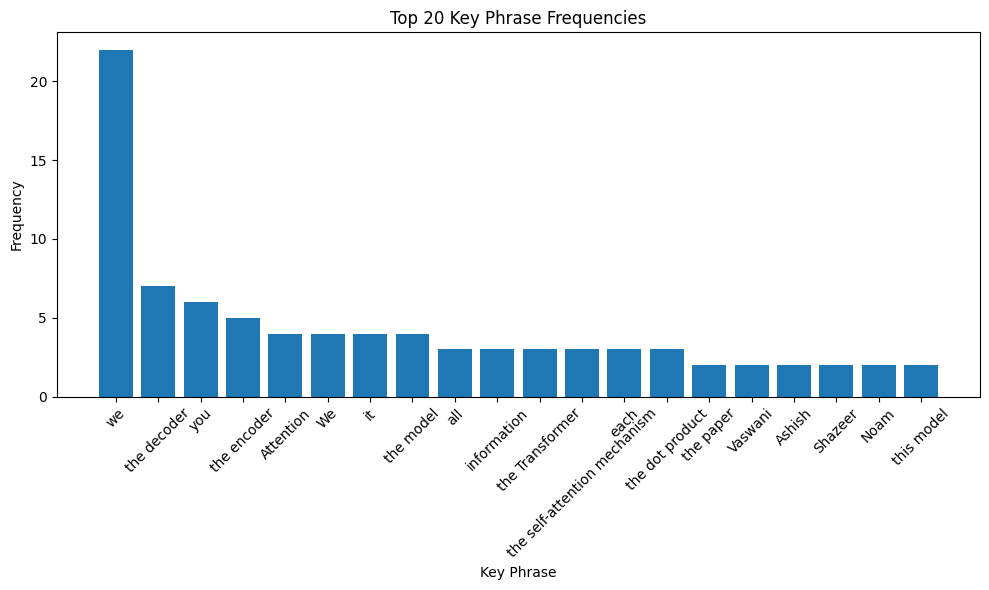

In [105]:
from collections import Counter
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Extract key phrases from summaries
df['Key Phrases'] = df['Summary'].apply(lambda x: [chunk.text for chunk in nlp(x).noun_chunks])

# Flatten the list of key phrases
all_phrases = [phrase for phrases in df['Key Phrases'] for phrase in phrases]

# Count the occurrences of each key phrase
phrase_counts = Counter(all_phrases)

# Select the top 20 key phrases with highest frequencies
top_phrases = phrase_counts.most_common(20)
top_phrases, frequencies = zip(*top_phrases)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_phrases, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Key Phrase')
plt.ylabel('Frequency')
plt.title('Top 20 Key Phrase Frequencies')
plt.tight_layout()
plt.show()

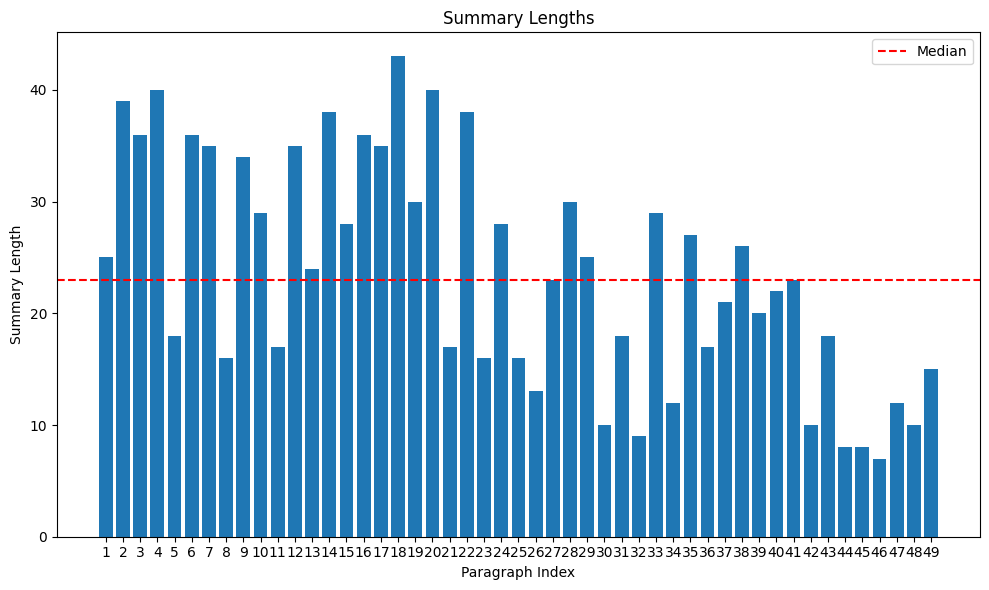

In [109]:
# Calculate summary lengths
df['Summary Length'] = df['Summary'].apply(lambda x: len(x.split()))

# Calculate the median summary length
median_length = np.median(df['Summary Length'])

# Create the plot for summary lengths
plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df['Summary Length'])
plt.axhline(median_length, color='red', linestyle='--', label='Median')
plt.xticks(range(len(df)), range(1, len(df) + 1))
plt.xlabel('Paragraph Index')
plt.ylabel('Summary Length')
plt.title('Summary Lengths')
plt.legend()
plt.tight_layout()
plt.show()